# Exploracíon del dataset
_Santiago Prieto Núñez_

#### Objetivo
En este Jupiter Notebook explporaremos la forma de los datos de distintos dataset
obteniendo su distribución de tamaño de imágen, número de canales de la imágen,
tipo de etiquetado de la misma, ya que podemos tener desde máscaras con la 
localización del pólipo a sencillas etiquetas y cantidad de imágenes de tipo WLI
o NBI. o más tipos si los hubiera.

Los datasets explorados son los siguientes:
- Piccolo Dataset
- Kvasir Dataset
- CVC Dataset
- Polyp DB

In [1]:
import sys
import os

path_to_add = os.path.abspath('../utils')
if path_to_add not in sys.path:
    sys.path.append(path_to_add)

## CVC dataset
Este dataset es comunmenete utilizado y utiliza un formato de datos muy parecido
a otros datasets públicos.

Este dataset classifica la información usando:
- Máscara binaria

Total imágenes: 579
Composición del dataset:
Resoluciónes: total distintas resoluciones 1
	288x384: 579

Tipos de luz:
	Unknown: 579

Splits:
	None: 579

Canales:
	polyp_RGB: 579	mask_L: 579

Tipos de lesión:


Volumen medio de los pólipos respecto a la imagen:	9.47161928092817%
Volumen medio de las bbox respecto a la imagen:	14.5141781158047%
Distancia media del centro del pólipos al centro de la imagen:	67.27896389038054px


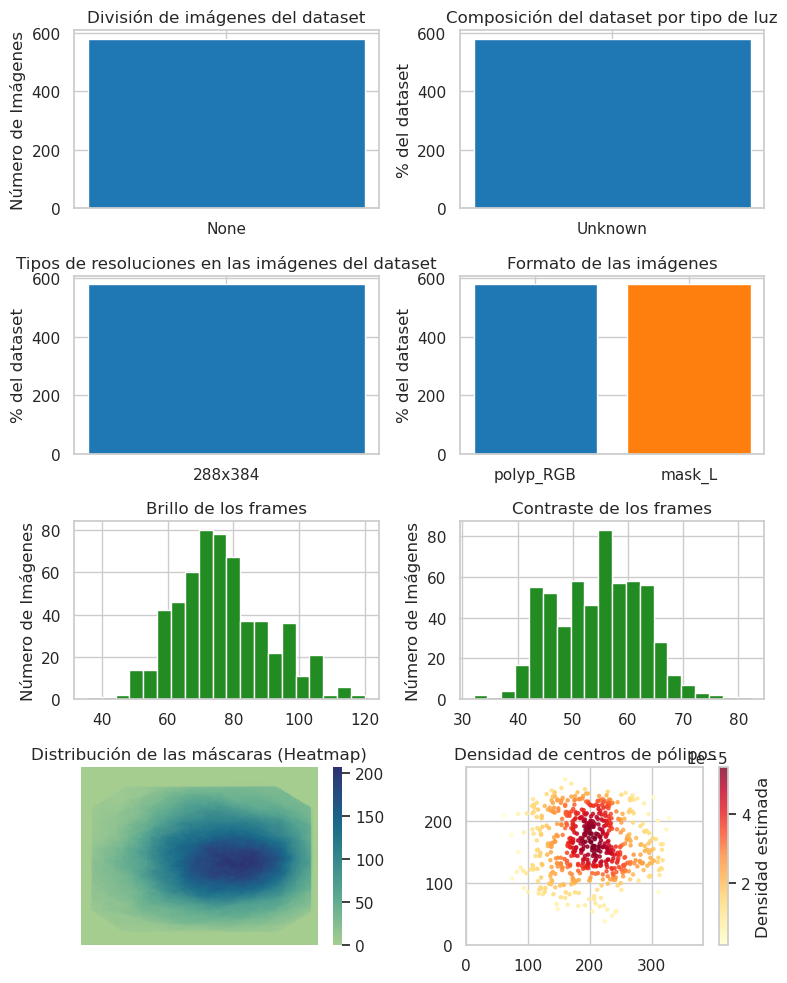

In [2]:
from utils import ImageDatasetProcessor as idp

DS_PATH = "../datasets"
json_path = DS_PATH + "/CVC-ClinicDB/cvc_dict.json"

# paths del dataset
path = (
    DS_PATH + "/CVC-ClinicDB/polyps",   # polyps
    DS_PATH + "/CVC-ClinicDB/masks")    # masks  

# inicializamos el dataset con su nombre y fichero de formatos de imagen
dt_cvc = idp(target_resolution=(384, 288), dataset_name="CVC",
                     json_path=json_path)

# procesamos el dataset si no existe el json
if not os.path.isfile(json_path):
    dt_cvc.load_dataset(path[0], path[1])

dt_cvc.print_summary()
dt_cvc.graph_summary()


## Piccolo dataset

En este dataset es el que usamos de base

Este dataset clasifica la información usando:
- Máscara binaria
- Metadatos clínicos

In [3]:
DS_NAME = "Piccolo"
json_path = f"{DS_PATH}/piccolo_dataset/{DS_NAME}_dict.json"

# paths del dataset
paths_img = [
    # train paths
    (DS_PATH + "/piccolo_dataset/test/polyps",                      # polyps
     DS_PATH + "/piccolo_dataset/test/masks",                       # masks
     DS_PATH + "/piccolo_dataset/test/void", "test"  ,              # voids
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv"),      # light type

    # test paths
    (DS_PATH + "/piccolo_dataset/train/polyps",
     DS_PATH + "/piccolo_dataset/train/masks",
     DS_PATH + "/piccolo_dataset/train/void", "train",
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv"),

    # validation paths
    (DS_PATH + "/piccolo_dataset/validation/polyps",
     DS_PATH + "/piccolo_dataset/validation/masks",
     DS_PATH + "/piccolo_dataset/validation/void", "validation",
     DS_PATH + "/piccolo_dataset/listado_WL-NBI_Piccolo.csv")]

# inicializamos el dataset con su nombre y fichero de formatos de imagen
dt_Piccolo = idp(target_resolution=(400, 240), dataset_name=DS_NAME,
                     json_path=json_path)

# procesamos el dataset si no existe el json
if not os.path.isfile(json_path):
    for path in paths_img:
        print(f"procesando conjunto: {path[3]}")
        dt_Piccolo.load_dataset(path[0], path[1], voids_path=path[2], 
                                split=path[3], light_csv=path[4])

In [4]:
dt_Piccolo.print_summary()

Total imágenes: 2814
Composición del dataset:
Resoluciónes: total distintas resoluciones 2
	480x854: 1595	1080x1920: 1219

Tipos de luz:
	WL: 1748	NBI: 1066

Splits:
	test: 207	train: 1961	validation: 646

Canales:
	polyp_RGB: 2814	mask_L: 2814	void_L: 2814

Tipos de lesión:


Volumen medio de los pólipos respecto a la imagen:	21.551499763223188%
Volumen medio de las bbox respecto a la imagen:	28.817394568938614%
Distancia media del centro del pólipos al centro de la imagen:	51.05081748875445px


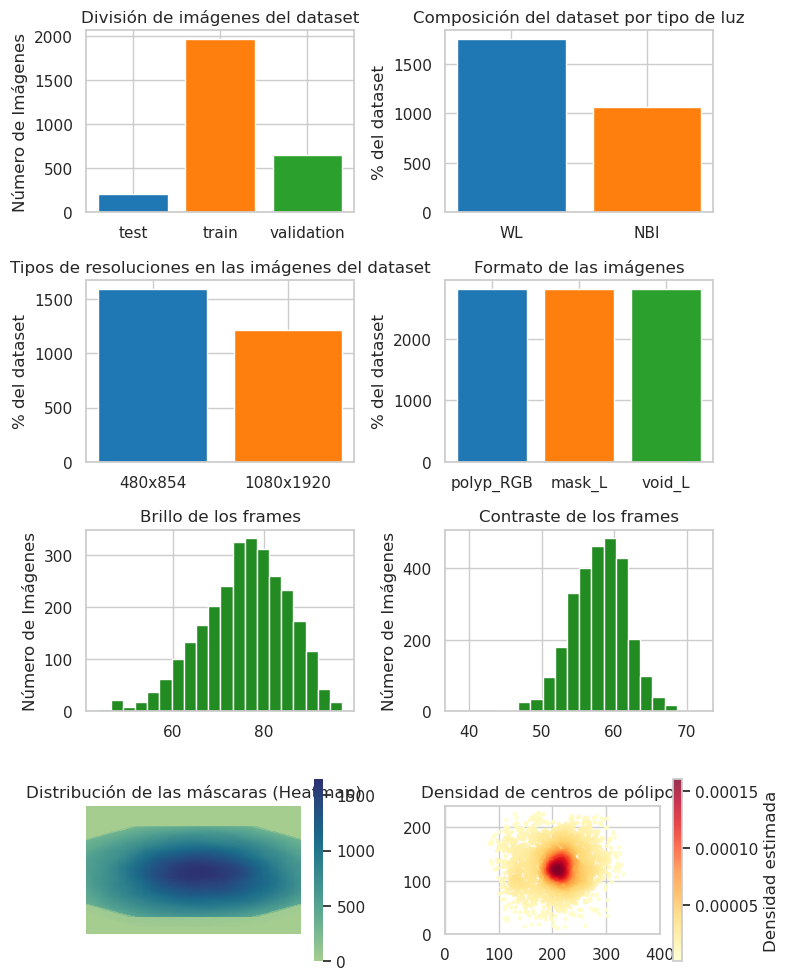

In [5]:
dt_Piccolo.graph_summary()

## Kvasir-Seg

Este dataset clasifica los polipos con:
- Máscaras binarias
- Bounding boxes

In [6]:
DS_NAME = "Kvasir SEG"
json_path = f"{DS_PATH}/piccolo_dataset/{DS_NAME}_dict.json"

# paths del dataset
paths_img = []

# inicializamos el dataset con su nombre y fichero de formatos de imagen
dt_Kevasir_SEG = idp(target_resolution=(400, 240), dataset_name=DS_NAME,
                     json_path=json_path)

# procesamos el dataset si no existe el json
if not os.path.isfile(json_path):
    for path in paths_img:
        print(f"procesando conjunto: {path[3]}")
        dt_Kevasir_SEG.load_dataset(path[0], path[1], voids_path=path[2], 
                                split=path[3], light_csv=path[4])

dt_Kevasir_SEG.print_summary()

Total imágenes: 2814
Composición del dataset:
Resoluciónes: total distintas resoluciones 2
	480x854: 1595	1080x1920: 1219

Tipos de luz:
	WL: 1748	NBI: 1066

Splits:
	test: 207	train: 1961	validation: 646

Canales:
	polyp_RGB: 2814	mask_L: 2814	void_L: 2814

Tipos de lesión:


Volumen medio de los pólipos respecto a la imagen:	21.551499763223188%
Volumen medio de las bbox respecto a la imagen:	28.817394568938614%
Distancia media del centro del pólipos al centro de la imagen:	51.05081748875445px


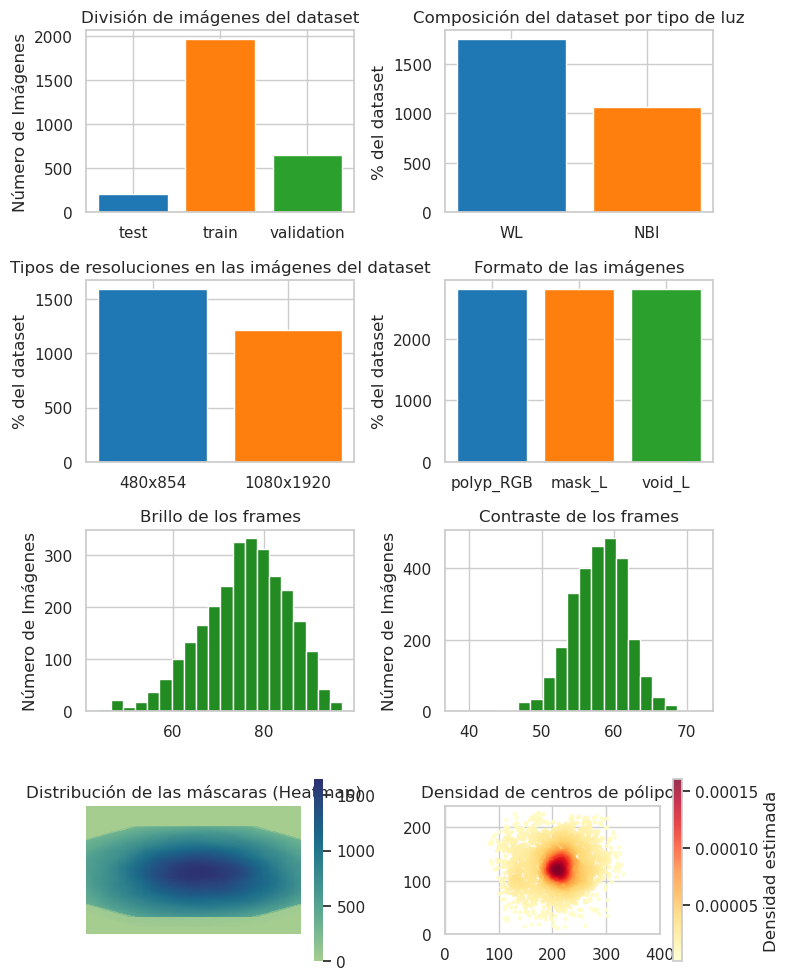

In [7]:
dt_Kevasir_SEG.graph_summary()

## PolypDB
Este dataset se caracteriza por ser bastante completo y dar imágenes en formatos
muy distintos de imágen con los siguientes métodos para clasificar las imágenes:
- Máscara binaria

_Apuntar que cargo tan solo los datos de modality wise_

In [9]:
DS_NAME = "PolypDB"
json_path = f"{DS_PATH}/PolypDB/{DS_NAME}_dict.json"

# paths del dataset
paths_img = [
    (DS_PATH + "/PolypDB/PolypDB_modality_wise/BLI/images",      # polyps
    DS_PATH + "/PolypDB/PolypDB_modality_wise/BLI/masks",        # masks
    "train", "BLI"),    
    (DS_PATH + "/PolypDB/PolypDB_modality_wise/FICE/images",      # polyps
    DS_PATH + "/PolypDB/PolypDB_modality_wise/FICE/masks",        # masks
    "train", "FICE"),
    (DS_PATH + "/PolypDB/PolypDB_modality_wise/LCI/images",      # polyps
    DS_PATH + "/PolypDB/PolypDB_modality_wise/LCI/masks",        # masks
    "train", "LCI"),
    (DS_PATH + "/PolypDB/PolypDB_modality_wise/NBI/images",      # polyps
    DS_PATH + "/PolypDB/PolypDB_modality_wise/NBI/masks",        # masks
    "train", "NBI"),
    (DS_PATH + "/PolypDB/PolypDB_modality_wise/WLI/images",      # polyps
    DS_PATH + "/PolypDB/PolypDB_modality_wise/WLI/masks",        # masks
    "train", "WLI")]

dt_PolypDB = idp(dataset_name=DS_NAME, json_path=json_path)

# cargamos todos los paths si no tenemos el json
if not os.path.isfile(json_path):       
    for path in paths_img:
        dt_PolypDB.load_dataset(path[0], path[1], 
                                split=path[2], dir_light_type=path[3])

dt_PolypDB.print_summary()

Imagen PKHL_15 220831_201027_BN093_011.jpg con vários pólipos
Imagen PKHL_15 220831_201027_BN093_012.jpg con vários pólipos
Imagen PKHL_15 220831_201028_BN026_032.jpg con vários pólipos
Imagen PKHL_15 220831_201028_BN026_041.jpg con vários pólipos
Imagen PKHL_15 220831_201028_BN061_002.jpg con vários pólipos
Imagen PKHL_15 220831_201030_BN049_034.jpg con vários pólipos
Imagen PKHL_15 220831_201031_BN073_017.jpg con vários pólipos
Imagen PKHL_15 220831_201031_BN073_022.jpg con vários pólipos
Imagen PKHL_15 220831_201031_BN073_051.jpg con vários pólipos
Imagen PKHL_15 220831_201031_BN073_052.jpg con vários pólipos
Imagen PKHL_15 220831_201102_BN054_034.jpg con vários pólipos
Imagen HMUH_15 201129_201111_BN002_006.jpg con vários pólipos
Imagen HMUH_15 201129_201111_BN002_007.jpg con vários pólipos
Imagen HMUH_15 201129_201111_BN002_008.jpg debajo del mínimo (0.5%)
Imagen HMUH_15 201129_201120_BN007_001.jpg con vários pólipos
Imagen HMUH_15 201129_201120_BN007_002.jpg con vários pólipos
Im

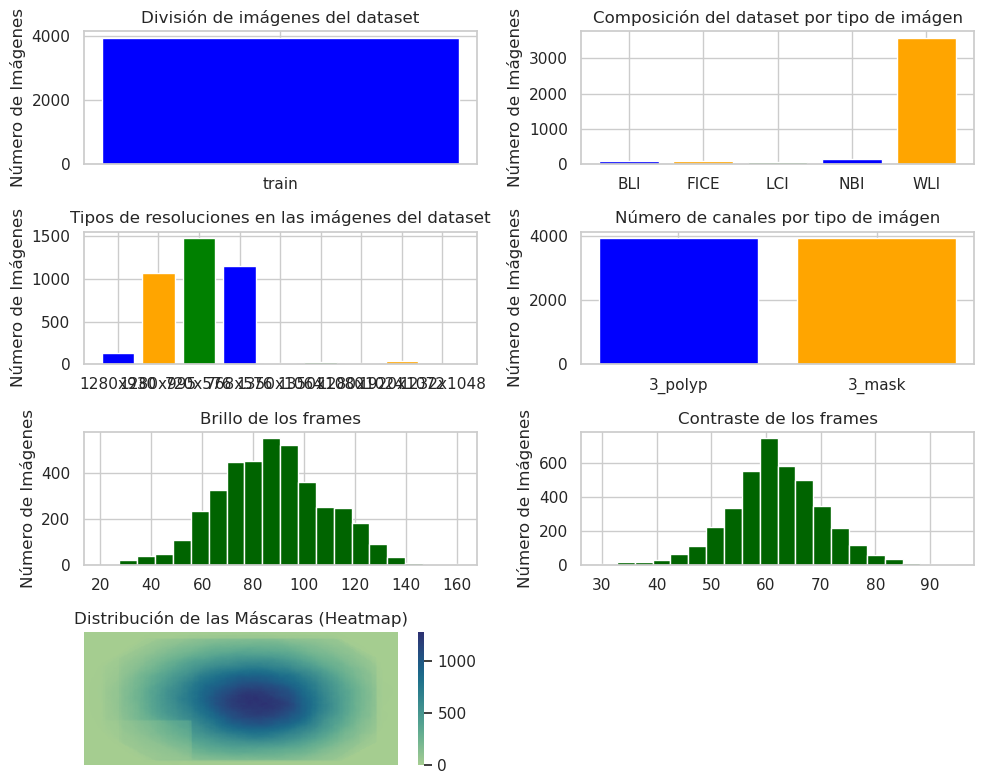

In [199]:
dt_PolypDB.graph_summary()